In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import decomposition

In [24]:
path = 'E:\PersonalFiles\杂项\Dissertation\Data/diabetes_data.csv'

def preprocess(path):
    with open(path, 'r') as f:
        df = pd.read_csv(path)
    df['Gender'] = df['Gender'].replace('Male', 1)
    df['Gender'] = df['Gender'].replace('Female', 0)
    df.iloc[:, 2:] = df.iloc[:, 2:].replace({'Yes':1, 'No':0, 'Positive':1, 'Negative':0})
    df.iloc[:, 0] = df.iloc[:, 0] / 90

    x = df.iloc[:, :16]
    y = df.iloc[:, 16]
    return df, x, y

df, x, y = preprocess(path)

In [25]:
df.shape

(520, 17)

In [26]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

PCA降维

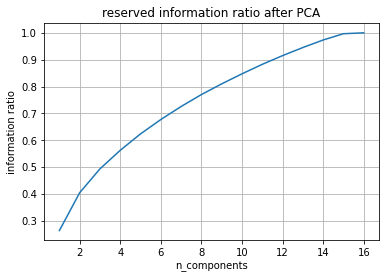

In [32]:
n = range(1, 17)
ls = []
for i in range(1, 17):
    pca = decomposition.PCA(i)
    pca.fit(x)
    ls.append(pca.explained_variance_ratio_.sum())
plt.xlabel('n_components')
plt.ylabel('information ratio')
plt.title('reserved information ratio after PCA')
plt.plot(n, ls)
plt.grid()